# Thông tin sinh viên

Bài tập 5

Tên sinh viên: Nguyễn Phương Tùng

MSSV: 21520524






In [ ]:
from google.colab import drive
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from google.colab import drive
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

from skimage import feature
from bidict import bidict
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from PIL import Image
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive
import os
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

from skimage import feature
from bidict import bidict
from PIL import Image

import os

In [ ]:
# Kết nối Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Đường dẫn đến thư mục chứa dữ liệu trong Google Drive
data_path = '/content/drive/MyDrive/CS231.O22.1/Baitap/Baitap6/images'

In [ ]:
# Install skfuzzy
!pip install scikit-fuzzy

In [ ]:
from PIL import Image
import numpy as np
from sklearn.cluster import MeanShift, KMeans
import matplotlib.pyplot as plt


def read_image(filename):
    image = cv2.imread(filename, 1)
    cv2_imshow(image)
    return np.array(image)

def apply_meanshift(image):
    ms = MeanShift()
    ms.fit(image)
    labels = ms.labels_
    centers = ms.cluster_centers_
    return labels, centers

def apply_kmeans(image, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(image)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    return labels, centers

def display_clustered_image(labels, centers, original_shape):
    # Reshape the labels to match the original image shape
    clustered_image = labels.reshape(original_shape[:2])

    # Display the clustered image
    plt.imshow(clustered_image)
    plt.title("Clustered Image")
    plt.axis('off')
    plt.show()

In [ ]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from sklearn.cluster import MeanShift, estimate_bandwidth
import skfuzzy as fuzz
from google.colab import drive

In [ ]:
def read_image_rgb(filename):
    image = cv2.imread(filename, cv2.IMREAD_COLOR) # Đọc ảnh với khung màu BGR
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Chuyển đổi khung màu sang RGB
    return image
def display_image(image):
    cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Yêu cầu 1

In [ ]:
yeucau1_1 =['vegetables.jpg', 'hand.jpg', 'thuoc.jpg' ,'dogcat.jpg']
# Đường dẫn đến ảnh
for filename in yeucau1_1:
  # Liệt kê các thư mục train và test
  image_path = os.path.join(data_path, filename)
  # Đọc ảnh từ đường dẫn
  image = read_image_rgb(image_path)
  # display_image(image)

  print(image.shape)  # Should show (num_pixels, 5)
  print(image)        # Displays the (r, g, b, x, y) array


(255, 200, 3)
[[[247 230 211]
  [247 230 211]
  [247 230 211]
  ...
  [245 228 207]
  [250 229 208]
  [249 228 206]]

 [[244 229 213]
  [243 228 212]
  [243 228 212]
  ...
  [244 228 211]
  [245 228 209]
  [243 226 207]]

 [[237 225 219]
  [237 225 219]
  [236 226 219]
  ...
  [235 225 215]
  [235 223 211]
  [232 220 208]]

 ...

 [[246 241 238]
  [246 242 237]
  [246 241 238]
  ...
  [242 243 239]
  [242 243 239]
  [242 243 239]]

 [[246 242 237]
  [246 243 235]
  [246 242 237]
  ...
  [246 245 235]
  [247 245 235]
  [247 246 236]]

 [[248 242 235]
  [248 243 234]
  [248 242 235]
  ...
  [251 246 231]
  [254 247 232]
  [253 248 233]]]
(309, 384, 3)
[[[ 17  17  31]
  [ 24  24  38]
  [ 22  19  34]
  ...
  [ 15   0  16]
  [ 15   1   3]
  [ 27  12   9]]

 [[ 60  61  71]
  [ 49  50  60]
  [ 13  11  23]
  ...
  [ 32  17  45]
  [ 46  32  44]
  [ 61  47  51]]

 [[ 85  88  92]
  [ 51  54  58]
  [ 13  13  19]
  ...
  [ 79  63 117]
  [ 92  81 113]
  [ 70  61  82]]

 ...

 [[ 19  16  32]
  [ 26  

In [ ]:
def read_image_rgbxy(filename):
    image = cv2.imread(filename, cv2.IMREAD_COLOR)  # Read the image in BGR color space
    if image is None:
        raise ValueError(f"Image not found or unable to read: {filename}")

    # Convert BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Get the shape of the image
    height, width, _ = image_rgb.shape

    # Create arrays for x and y coordinates
    y_coords, x_coords = np.meshgrid(np.arange(height), np.arange(width), indexing='ij')

    # Flatten the image and coordinates arrays
    image_rgb_flat = image_rgb.reshape(-1, 3)
    x_coords_flat = x_coords.flatten()
    y_coords_flat = y_coords.flatten()

    # Stack RGB values with x and y coordinates
    image_with_coords = np.column_stack((image_rgb_flat, x_coords_flat, y_coords_flat))

    return image_with_coords



yeucau1_2 =['vegetables.jpg', 'thuoc.jpg']
# Đường dẫn đến ảnh
for filename in yeucau1_2:
  # Liệt kê các thư mục train và test
  image_path = os.path.join(data_path, filename)
  # Đọc ảnh từ đường dẫn
  image = read_image_rgbxy(image_path)

  print(image.shape)  # Should show (num_pixels, 5)
  print(image)        # Displays the (r, g, b, x, y) array


(51000, 5)
[[211 230 247   0   0]
 [211 230 247   1   0]
 [211 230 247   2   0]
 ...
 [231 246 251 197 254]
 [232 247 254 198 254]
 [233 248 253 199 254]]
(25671, 5)
[[ 14  12  13   0   0]
 [ 14  12  13   1   0]
 [ 13  13  13   2   0]
 ...
 [ 18  27  36 196 128]
 [ 18  27  34 197 128]
 [ 10  19  26 198 128]]


# Mean shift

## MeanShift + RGB

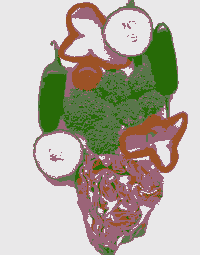

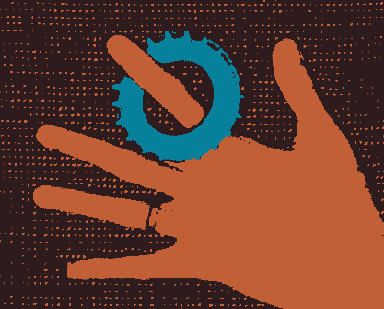

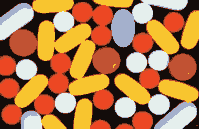

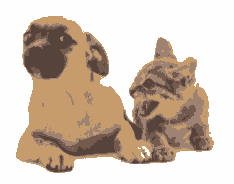

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth

def Meanshift(img):
  nrow, ncol, nchl = img.shape
  flat_img = img.reshape(-1, nchl)
  flat_img = flat_img.astype(np.float32) / 255.0

  bandwidth = estimate_bandwidth(flat_img, quantile=0.1, n_samples=500)
  meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
  meanshift.fit(flat_img)

  cluster_centers = meanshift.cluster_centers_
  labels = meanshift.labels_

  segmented_img = cluster_centers[labels]
  segmented_img = (segmented_img * 255).astype(np.uint8)
  img_res = segmented_img.reshape(nrow, ncol, nchl)

  return img_res



yeucau1_1 =['vegetables.jpg', 'hand.jpg', 'thuoc.jpg' ,'dogcat.jpg']
# Đường dẫn đến ảnh
for filename in yeucau1_1:
  # Liệt kê các thư mục train và test
  image_path = os.path.join(data_path, filename)
  # Đọc ảnh từ đường dẫn
  image = read_image_rgb(image_path)

  new_image = Meanshift(image)
  cv2_imshow(new_image)
   print("\n")




## MeanShift + RGBXY

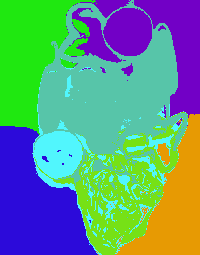

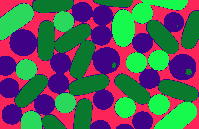

In [ ]:
import cv2
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
import os

def Meanshift2(image_with_coords):
    img_tmp = image_with_coords.copy()
    n_pixels, n_features = img_tmp.shape

    if n_features != 5:
        raise ValueError("Expected each pixel to have 5 features: (r, g, b, x, y)")

    bandwidth = estimate_bandwidth(img_tmp, quantile=0.1, n_samples=500)
    meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    meanshift.fit(img_tmp)

    # Generate random colors for the clusters
    unique_labels = np.unique(meanshift.labels_)
    arrcolor = np.random.rand(len(unique_labels), 3) * 255
    t = arrcolor[meanshift.labels_]

    # Create an empty image to store the result
    img_res = np.zeros((image_with_coords[:, 4].max() + 1, image_with_coords[:, 3].max() + 1, 3), dtype=np.uint8)

    # Assign the cluster colors to the corresponding pixels
    for idx, (r, g, b, x, y) in enumerate(image_with_coords):
        img_res[int(y), int(x)] = t[idx]

    return img_res

yeucau1_2 = ['vegetables.jpg', 'thuoc.jpg']
# Process each image
for filename in yeucau1_2:
    image_path = os.path.join(data_path, filename)

    # Read the image with RGBXY representation
    image_with_coords = read_image_rgbxy(image_path)

    # Apply MeanShift clustering
    new_image = Meanshift2(image_with_coords)

    # Display the clustered image using cv2.imshow
    cv2_imshow(new_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
     print("\n")


# FCM

In [ ]:
!pip install fuzzy-c-means

## FCM + RGB

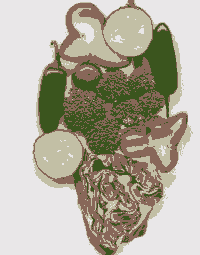

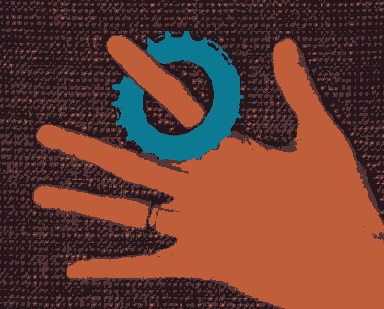

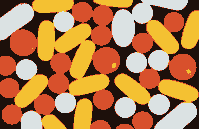

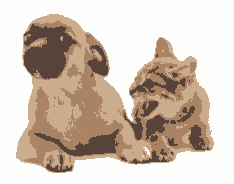

In [ ]:
import cv2
import numpy as np
import os
!pip install fuzzy-c-means
from fcmeans import FCM
import matplotlib.pyplot as plt

def fcm_clustering(img, n_clusters=3):
    nrow, ncol, nchl = img.shape
    flat_img = img.reshape(-1, nchl)
    flat_img = flat_img.astype(np.float32) / 255.0

    fcm = FCM(n_clusters=n_clusters)
    fcm.fit(flat_img)
    labels = fcm.u.argmax(axis=1)
    cluster_centers = fcm.centers

    segmented_img = cluster_centers[labels]
    segmented_img = (segmented_img * 255).astype(np.uint8)
    img_res = segmented_img.reshape(nrow, ncol, nchl)

    return img_res

def read_image_rgb(filename):
    image = cv2.imread(filename, cv2.IMREAD_COLOR)  # Read the image in BGR color space
    if image is None:
        raise ValueError(f"Image not found or unable to read: {filename}")

    # Convert BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image_rgb

yeucau1_1 = ['vegetables.jpg', 'hand.jpg', 'thuoc.jpg', 'dogcat.jpg']

# Process each image
for filename in yeucau1_1:
    image_path = os.path.join(data_path, filename)

    # Read the image from the path
    image = read_image_rgb(image_path)

    # Apply FCM clustering
    new_image = fcm_clustering(image, n_clusters=4)  # You can change the number of clusters as needed

    # Display the new clustered image
    #cv2_imshow(new_image)
    cv2_imshow(cv2.cvtColor(new_image, cv2.COLOR_RGB2BGR))
    cv2.waitKey(0)
    cv2.destroyAllWindows()
     print("\n")

##  FCM + RGBXY

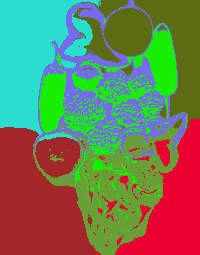

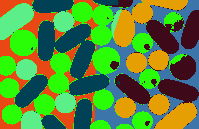

In [ ]:
import cv2
import numpy as np
from fcmeans import FCM
import os

def read_image_rgbxy(filename):
    image = cv2.imread(filename, cv2.IMREAD_COLOR)  # Read the image in BGR color space
    if image is None:
        raise ValueError(f"Image not found or unable to read: {filename}")

    # Convert BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Get the shape of the image
    height, width, _ = image_rgb.shape

    # Create arrays for x and y coordinates
    y_coords, x_coords = np.meshgrid(np.arange(height), np.arange(width), indexing='ij')

    # Flatten the image and coordinates arrays
    image_rgb_flat = image_rgb.reshape(-1, 3)
    x_coords_flat = x_coords.flatten()
    y_coords_flat = y_coords.flatten()

    # Stack RGB values with x and y coordinates
    image_with_coords = np.column_stack((image_rgb_flat, x_coords_flat, y_coords_flat))

    return image_with_coords

def fcm2(image_with_coords, clusters=6):
    g = image_with_coords.copy()

    model = FCM(n_clusters=clusters, max_iter=300)
    model.fit(g)
    labels = model.predict(g)

    arrcolor = np.random.rand(clusters, 3) * 255
    t = arrcolor[labels]

    height = int(g[:, 4].max() + 1)
    width = int(g[:, 3].max() + 1)
    img_res = np.zeros((height, width, 3), dtype=np.uint8)

    for idx, (r, g, b, x, y) in enumerate(image_with_coords):
        img_res[int(y), int(x)] = t[idx]

    return img_res

yeucau1_2 = ['vegetables.jpg', 'thuoc.jpg']

# Process each image
for filename in yeucau1_2:
    image_path = os.path.join(data_path, filename)

    # Read the image with RGBXY representation
    image_with_coords = read_image_rgbxy(image_path)

    # Apply FCM clustering
    new_image = fcm2(image_with_coords, clusters=7)

    # Display the clustered image using cv2.imshow
    cv2_imshow(new_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    print("\n")
    print("\n")
    print("\n")

# Yêu cầu 2

In [ ]:
import cv2
import numpy as np

def apply_graphcut(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image not found or unable to read: {image_path}")

    mask = np.zeros(image.shape[:2], np.uint8)

    bgd_model = np.zeros((1, 65), np.float64)
    fgd_model = np.zeros((1, 65), np.float64)

    if "Lionel-Messi.jpg" in image_path:
        rect = (200, -10, 300, 420)
    elif "camourflage_00097" in image_path:
        rect = (100, 100, 150, 100)
    elif "camourflage_00197" in image_path:
        rect = (50, 100, 650, 465)
    elif "camourflage_00012" in image_path:
        rect = (100, 100, 150, 100)
    elif "camourflage_00129" in image_path:
        rect = (100, 100, 150, 100)
    elif "dogcat.jpg" in image_path:
        rect = (60, 30, 400, 300)
    elif "camourflage_00166" in image_path:
        rect = (100, 100, 150, 100)

    cv2.grabCut(image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
    image = image * mask2[:, :, np.newaxis]

    return image

def display_image(image, title="Image"):
    cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

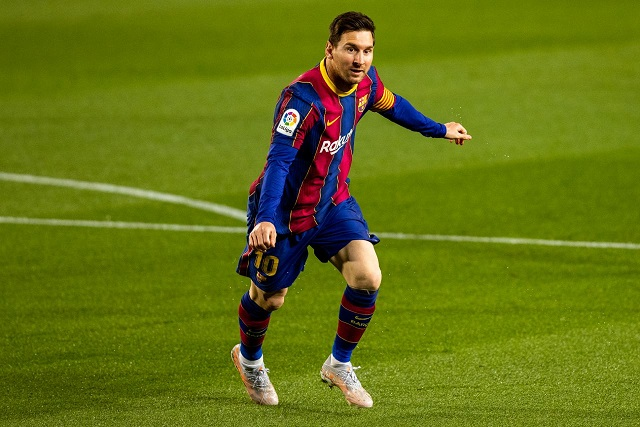

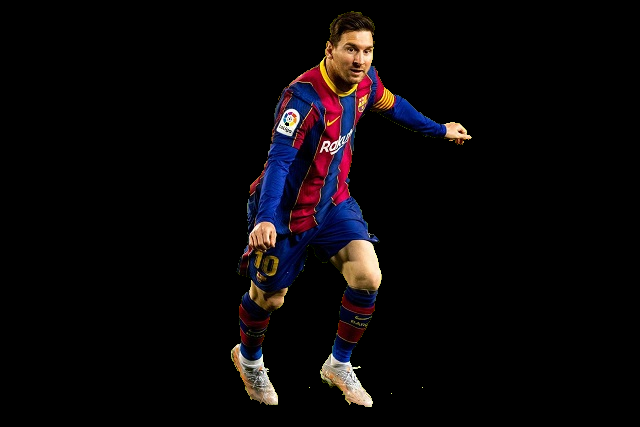

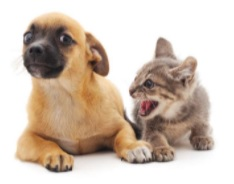

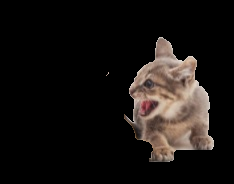

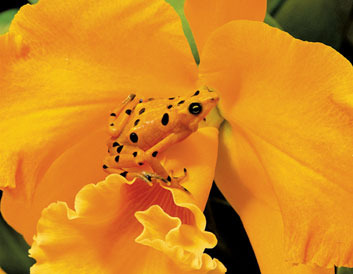

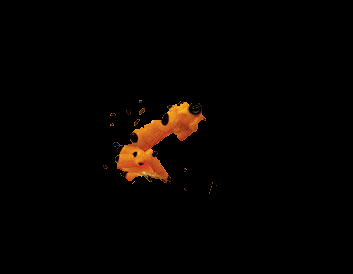

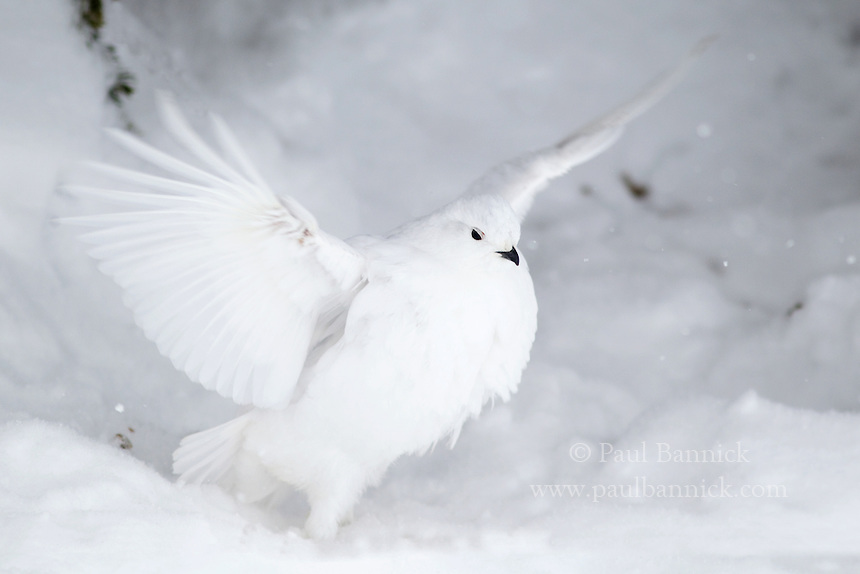

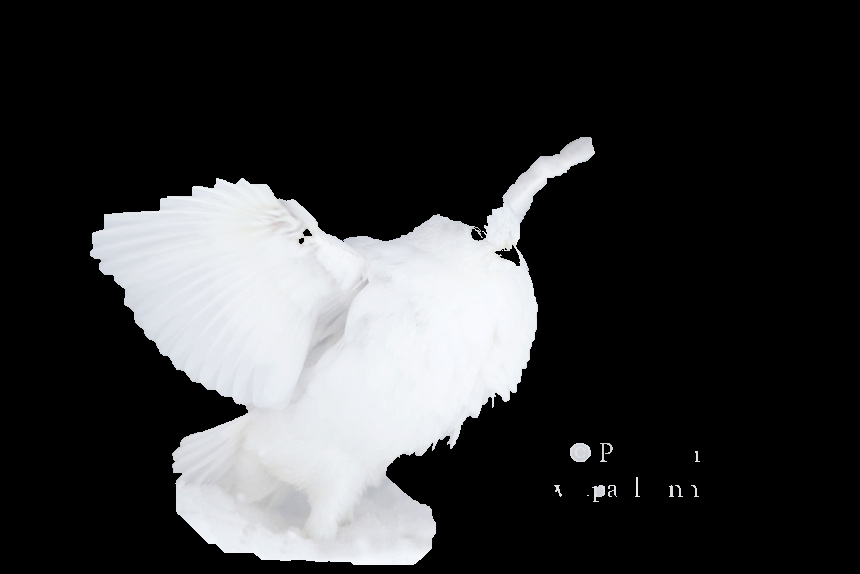

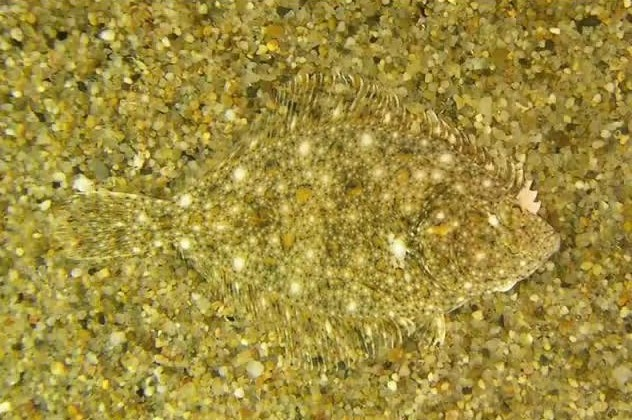

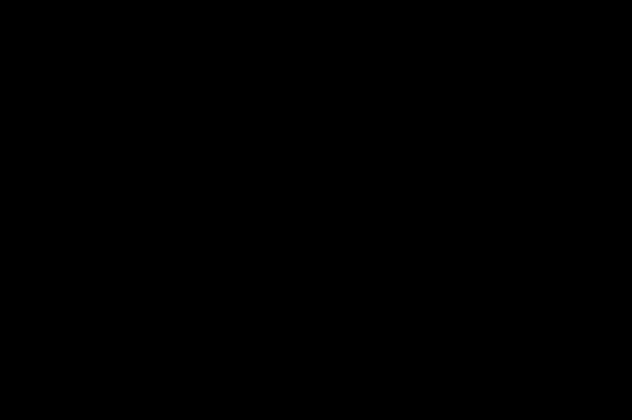

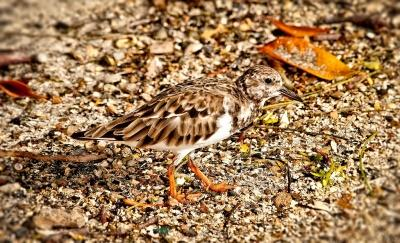

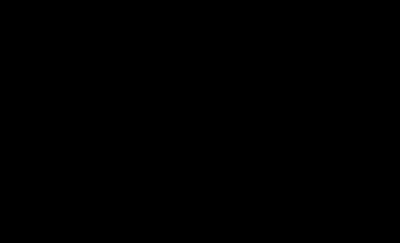

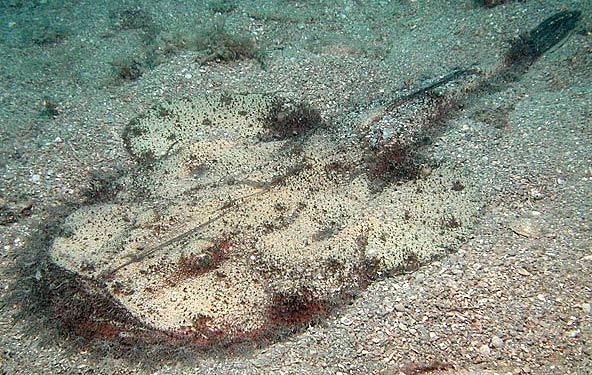

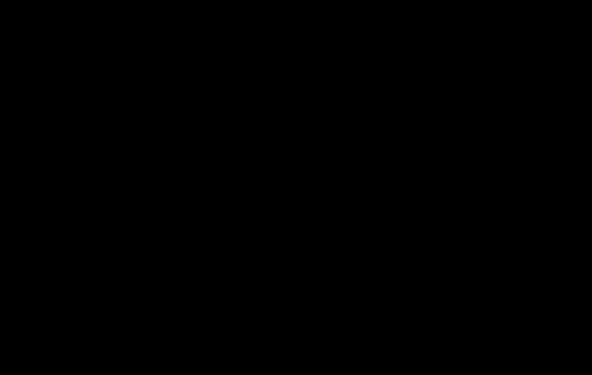

In [ ]:
image_files = ['Lionel-Messi.jpg', 'dogcat.jpg', 'camourflage_00097.jpg', 'camourflage_00197.jpg', 'camourflage_00012.jpg', 'camourflage_00129.jpg', 'camourflage_00166.jpg']

for filename in image_files:
    image_path = os.path.join(data_path, filename)
    print("\n\n")
    image = cv2.imread(image_path)
    cv2_imshow(image)
    segmented_image = apply_graphcut(image_path)

    display_image(segmented_image, title=filename)

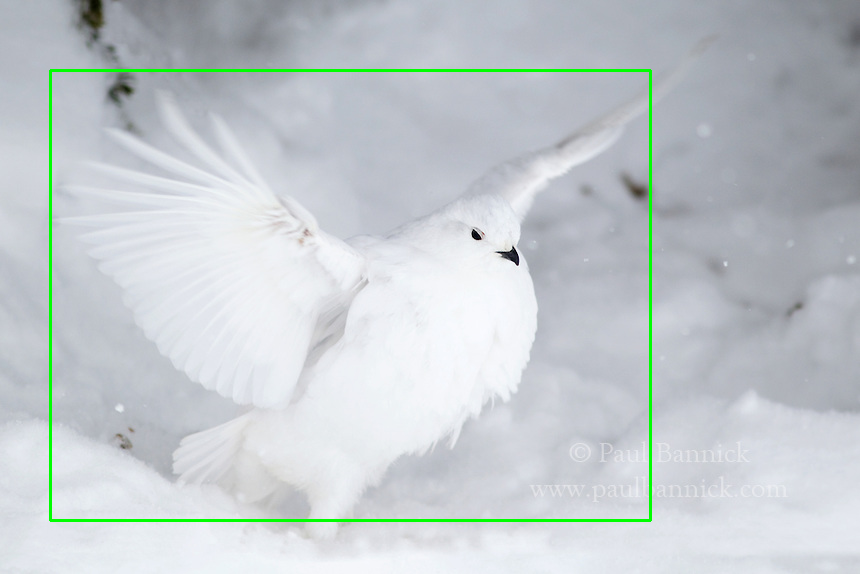

In [ ]:
import cv2

# Đọc hình ảnh
# Đọc ảnh
data_path = '/content/drive/My Drive/CS231.O22.1/Baitap/Baitap6/images'
image_path = os.path.join(data_path, 'camourflage_00197.jpg')
img = cv2.imread(image_path)

# Chuyển đổi hình ảnh sang grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Áp dụng threshold để tách đối tượng khỏi nền
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Tìm kiếm contours trên hình ảnh
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Lấy contour đầu tiên và tính toán hình chữ nhật bao quanh nó
cnt = contours[0]
x, y, w, h = 50, 70, 600, 450

# Vẽ hình chữ nhật lên hình ảnh gốc
cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Hiển thị hình ảnh
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()